# Lecture 22 
- Vector Projection
- Span
- Bases
- Gram-Schmidt Process
- Rotation Matrix
- Matrix Multiplication

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

def plotvec(*argv):
    colors=['k','b','r','g','c','m']
    xmin=0
    xmax=-1000000
    ymin=0
    ymax=-1000000
    origin=[0,0]
    plt.figure()
    for e in enumerate(argv):
        i=e[0]
        arg=e[1]
        plt.quiver(*origin,*arg,angles='xy',scale_units='xy',scale=1,
                   color=colors[i%len(colors)])
        xmin=min(xmin,arg[0])
        xmax=max(xmax,arg[0])
        ymin=min(ymin,arg[1])
        ymax=max(ymax,arg[1])
    plt.xlim(min(-1, xmin-1), max(1,xmax+1))
    plt.ylim(min(-1,ymin-1),max(1,ymax+1))

# Vector Projection, Spanning Sets and Bases

### Vector Correlation

Recall the angle relation for 2-vectors introduced last week:

\begin{align*}
\mathbf{x}^T\mathbf{y} = \Vert\mathbf{x}\Vert \Vert\mathbf{y}\Vert\cos\theta
\end{align*}

<div class="alert alert-info">
    <b>Vector Correlation</b>

Then the **vector correlation** between $\mathbf{x}$  and $\mathbf{y}$ is 

\begin{align*}
r = \frac{\mathbf{x}^T\mathbf{y}}{\Vert\mathbf{x}\Vert\Vert\mathbf{y}\Vert} = \cos(\theta)
\end{align*}
    
</div>

* Why would we call this vector correlation? First, let's write out the operations of vector correlation:

\begin{align*}
r &= \frac{  \sum_{i} x_i y_i }
{\sqrt{ \sum_{i} x_{i}^{2}}\sqrt{ \sum_{j}y_{j}^{2}}}
\end{align*}

Now recall the form of Pearson's correlation:
\begin{align*}
\rho_{xy} &= \frac{\text{cov}(\mathbf{x},\mathbf{y})}{\sigma_X \sigma_Y} \\
&= \frac{ \frac{1}{N-1} \sum_{i} (x_i- \mu_x)(y_i -\mu_y)}
{\sqrt{\frac{1}{N-1} \sum_{i} (x_i- \mu_x)^2}\sqrt{\frac{1}{N-1} \sum_{j}(y_j -\mu_y)^2}}
\end{align*}

If $\mu_x=\mu_y=0$, this simplifies to 
\begin{align*}
\rho_{xy} &= \frac{\text{cov}(\mathbf{x},\mathbf{y})}{\sigma_X \sigma_Y} \\
&= \frac{  \sum_{i} x_i y_i }
{\sqrt{ \sum_{i} x_{i}^{2}}\sqrt{ \sum_{j}y_{j}^{2}}}
\end{align*}

<div class="alert alert-success">

So, if the vectors have been normalized to have zero-mean, **vector correlation** and **Pearson's correlation** have the same exact form! 
    
</div>

In addition, for 2-vectors separated by angle $\theta$,

\begin{align*}
r= \cos{\theta},
\end{align*}

which implies that

\begin{align*}
-1 \le r \le 1
\end{align*}

just like Pearson's correlation.

* Although we can only calculate the angle for 2-vectors, **correlation is a measure of similarity** between two vectors of **any dimensionality**

For instance, if $\mathbf{y}=c \mathbf{x}$ for some $c >0 $ a scalar value, the correlation between $\mathbf{x}$ and $\mathbf{y}$ is:

\begin{align*}
r &= \frac{  \sum_{i} x_i (cx_i) }
{\sqrt{ \sum_{i} x_{i}^{2}}\sqrt{ \sum_{j}(cx_{j})^{2}}} \\
 &= \frac{  c\sum_{i} x_{i}^{2} }
{\sqrt{ \sum_{i} x_{i}^{2}}\sqrt{ c^2 \sum_{j}x_{j}^{2}}} \\
&= 1
\end{align*}

It then important that we work with normalized vectors, or **unit vectors**.

### Normalizing a vector

<div class="alert alert-success">
    
A vector $\mathbf{x}$ is a **unit vector** if $\|\mathbf{x} \|=1$.
</div>

If $\|\mathbf{x} \| \ne 1$, we can create a unit vector in the same direction as $\mathbf{x}$ as

\begin{align*}
\tilde{\mathbf{x}} = \frac{\mathbf{x}}{\|\mathbf{x}\|}
\end{align*}

because

\begin{align*}
\left\| \tilde{\mathbf{x}} \right\| &= \left\| \frac{\mathbf{x}}{\|\mathbf{x}\|} \right\| \\
&=  \frac{\left\|\mathbf{x} \right\| }{\|\mathbf{x}\|}\\ 
&=1
\end{align*}

## Vector Projection

Then if we use $\tilde{\mathbf{x}}$ instead, we have

\begin{align*}
\mathbf{y}^T\tilde{\mathbf{x}} & = \left\Vert\frac{\mathbf{x}}{\| \mathbf{x} \|}\right\Vert \Vert\mathbf{y}\Vert\cos\theta \\
& =  \Vert\mathbf{y}\Vert\cos \theta 
\end{align*}

We call this *displacement* amount in the direction of $\tilde{\mathbf{x}}$ for the vector **projection** of $\mathbf{y}$ onto $\tilde{\mathbf{x}}$.

<div class="alert alert-info">
    <b>Vector Projection</b>

The **vector projection** of $\mathbf{y}$ onto $\mathbf{x}$ is defined as

\begin{align*}
\text{proj}_{\mathbf{x}}\mathbf{y} &= (\mathbf{y}^T\tilde{\mathbf{x}})\tilde{\mathbf{x}}
\end{align*}
    
where $\tilde{\mathbf{x}} = \frac{\mathbf{x}}{\Vert\mathbf{x}\Vert}$. We can then write,
    
\begin{align*}
\text{proj}_{\mathbf{x}}\mathbf{y} &= \frac{\mathbf{y}^T\mathbf{x}}{\Vert\mathbf{x}\Vert} \frac{\mathbf{x}}{\Vert\mathbf{x}\Vert} = \frac{\mathbf{y}^T\mathbf{x}}{\Vert\mathbf{x}\Vert^2} \mathbf{x}
\end{align*}
    
</div>

Let's see what that means pictorially using the *virtual whiteboard*.

Let $\mathbf{x}=[5,2]^T$ and $\mathbf{y}=[3,4]^T$:

In [2]:
x = np.array([5,2])
y = np.array([3,4])

x.shape


(2,)

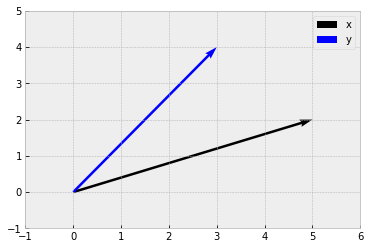

In [3]:
plotvec(x,y)
plt.legend(['x','y']);

Let's find and visualize the projection of $\mathbf{y}$ onto $\tilde{\mathbf{x}}$

In numpy, we can find the norm of a vector with ```np.linalg.norm()```:

In [4]:
np.linalg.norm(x)

5.385164807134504

Check:

In [5]:
np.sqrt(x@x)

5.385164807134504

For convenience, let's import ```numpy.linalg``` as ```la```:

In [6]:
import numpy.linalg as la

la.norm(x)

5.385164807134504

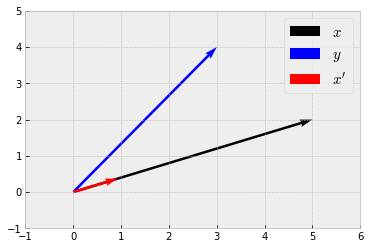

In [7]:
xt = x/la.norm(x)

plotvec(x, y, xt)


plt.legend(['$x$','$y$',"$x'$"],fontsize=15);

Then the projection of $\mathbf{y}$ onto $\tilde{\mathbf{x}}$ is 


In [8]:
p = y@xt
p

4.270992778072193

To show this as a projection onto the vector $\mathbf{x}$, we just need to scale $\tilde{\mathbf{x}}$ by this projection:

In [9]:
pv = p*xt

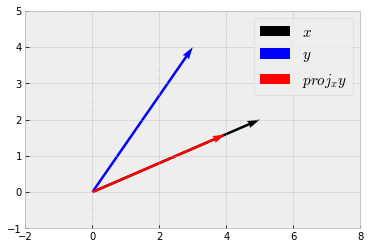

In [10]:
plotvec(x,y,pv)

plt.legend(['$x$','$y$',"$proj_{x}y$"],fontsize=15);
plt.xlim(-2,8);

<div class="alert alert-success">
    
So we can represent *any* vector in the direction of a unit vector by performing vector projection!
</div>

___

Let's use this to represent a vector $\mathbf{y}$ using a new set of axes.

Suppose our new axes are represented by **unit vectors** called $\mathbf{x}'$ and $\mathbf{y}'$ (here the primes don't have anything to do with derivatives).

Let $\mathbf{x}'$ be at an angle that is $60^\circ$ from the usual $x$-axis.

Let's find $\mathbf{x}'$ and $\mathbf{y}'$ using the *virtual whiteboard*.

In [11]:
xp = np.array([1/2, np.sqrt(3)/2]) # rotated x-axis by 60 degrees
yp = np.array([-np.sqrt(3)/2, 1/2]) # rotated y-axis by 60 degrees

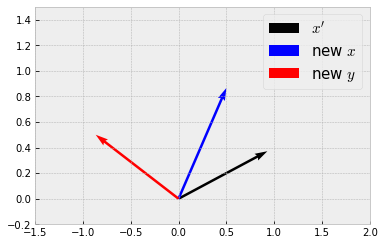

In [12]:
plotvec(xt, xp, yp)

plt.legend(["$x'$",'new $x$','new $y$'], fontsize=15);
plt.xlim([-1.5,2])
plt.ylim([-0.2,1.5]);

Verify that $\mathbf{x}'$ and $\mathbf{y}'$ are orthogonal:

In [13]:
xp@yp

0.0

<div class="alert alert-info">
    <b>Orthonormal Vector</b>
    
Since $\mathbf{x}'$ and $\mathbf{y}'$ are orthogonal and have been normalized, we say that $\{\mathbf{x}', \mathbf{y}'\}$ is a set of **orthonomal** vectors.
</div>

Now let's represent a vector using these new axes:

In [14]:
z=np.array([2,1.5])

In [15]:
la.norm(z)

2.5

In [16]:
# Scalar value in the direction of the new x-axis
zpx = z@xp

# Scalar value in the direction of the new y-axis
zpy = z@yp

zpx, zpy



(2.299038105676658, -0.9820508075688772)

Let's first visualize these projections:

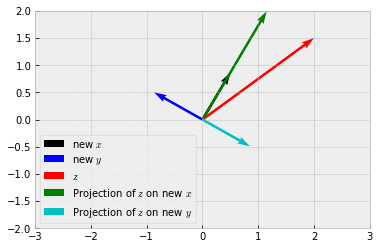

In [17]:
# Projecting z in the new x-axis
zx = zpx*xp

# Projecting z in the new y-axis
zy = zpy*yp

plotvec(xp, yp, z, zx, zy)

plt.legend(['new $x$','new $y$','$z$','Projection of $z$ on new $x$',
            'Projection of $z$ on new $y$'], loc='lower left');
plt.xlim([-3,3]); plt.ylim([-2,2]);

Note that we can completely reconstruct $\mathbf{z}$ from
$\mathbf{z}'$:

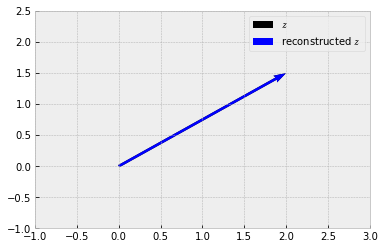

In [18]:
plotvec(z, zx+zy)

plt.legend(['$z$','reconstructed $z$']);

In [19]:
z - (zx + zy)

array([0., 0.])

Now what if we made a new vector from these projections? What would it look like?

In [20]:
zp = np.array([zpx, zpy])

zp

array([ 2.29903811, -0.98205081])

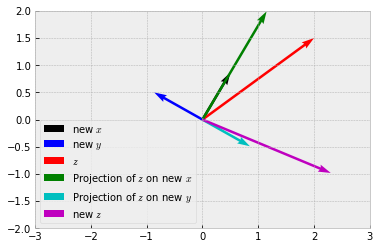

In [22]:
plotvec(xp,yp,z, zx, zy, zp)

plt.legend(['new $x$','new $y$','$z$','Projection of $z$ on new $x$',
            'Projection of $z$ on new $y$','new $z$'],loc='lower left')
plt.xlim([-3,3]); plt.ylim([-2,2]);

What is the angle between $\mathbf{z}$ and $\mathbf{z}'$?

In [23]:
theta = np.arccos(zp @ z / la.norm(zp) / la.norm(z)) # radians

In [25]:
np.degrees(theta)

59.99999999999999

So using the representation of $\mathbf{z}$ on these new axes is the same as **rotating** $\mathbf{z}$ by the amount the axes are rotated.

Let's verify that the representation has the same length as the original $\mathbf{z}$:

In [26]:
la.norm(z)

2.5

In [27]:
la.norm(zp)

2.5

We can actually do both inner products in one step.

Let's stack the vectors $\mathbf{x}'$ and $\mathbf{y}'$ side by side into an array.

First we need to convert to 2-D vectors:

In [28]:
print(xp, yp)

[0.5       0.8660254] [-0.8660254  0.5      ]


In [29]:
xp.shape, yp.shape

((2,), (2,))

In [31]:
xp2 = xp[:, np.newaxis]
yp2 = yp[:, np.newaxis]

xp2.shape, yp2.shape

((2, 1), (2, 1))

In [32]:
axes = np.hstack((xp2, yp2))

print(axes)

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


Now carrying out the inner product of the axes array (must be on left-hand side) with the $\mathbf{z}$ vector will do both vector inner products and stack the results into a new vector:

In [33]:
zp2 = axes.T @ z 

zp2

array([ 2.29903811, -0.98205081])

In [35]:
zp

array([ 2.29903811, -0.98205081])

Note that any vector in $\mathbb{R}^2$ can be represented using these new axes. 

<div class="alert alert-info">
    <b>Span</b>
    
We say that $\mathcal{S}=\{\mathbf{x}', \mathbf{y}'\}$ is a **spanning set** for $\mathbb{R}^2$ (or say that $\mathcal{S}$ **spans**  $\mathbb{R}^2$).
</div>

A minimum of 2 spanning vectors are required to represent everything in $\mathbb{R}^2$. (We say that the **dimension** of $\mathbb{R}^2$ is 2.)

Since the cardinality of $\mathcal{S}$ is $\left| \mathcal{S} \right|=2$, $\mathcal{S}$ is **minimal**.

We say that $\mathcal{S}$ is a **minimal spanning set** or a **basis** for $\mathbb{R}^2$.

<div class="alert alert-info">
    <b>Basis Set</b>
    
If $\mathcal{S}$ is a **minimal spanning set**, if the vectors $\mathcal{S}$ are orthonormal, we say that $\mathcal{S}$ is an orthonormal basis for $\mathbf{R}^D$, where $D=|\mathcal{S}|$.
</div>

**Why do we care?**

* Often we have high-dimensional data, and we want to apply the two-dimensional techniques that we know (like 2-D regression) to that data.

* Or we may want to perform data compression.

* We can do that if we can reduce the dimensionality, which corresponds to not using some dimensions. 

* But it may not be a good idea to completely throw away one element of each vector. 

* Instead, we may want to represent the data using a different basis and throw away one dimension in that representation.

**Next Steps**

1. We know one orthonormal basis for $\mathbb{R}^3$. How can we find another one?
2. Suppose we have a set of vectors. How can we find an orthonormal basis for them?

Let's try to get some insight by finding a new basis for $\mathbf{R}^3$. 

Start with some random vectors:

In [36]:
import numpy.random as npr

In [37]:
npr.seed(7) # so we all the get the same result

R = npr.rand(3,3)

R

array([[0.07630829, 0.77991879, 0.43840923],
       [0.72346518, 0.97798951, 0.53849587],
       [0.50112046, 0.07205113, 0.26843898]])

We will treat these as 3 horizontally stacked vectors. Let's start by creating a new "x" axis from the first vector:

In [38]:
R[:,0]

array([0.07630829, 0.72346518, 0.50112046])

In [40]:
x1 = R[:,0]/la.norm(R[:,0])

x1

array([0.08638294, 0.8189811 , 0.56728119])

Now, what if we tried to do that with the second column:

In [41]:
y1 = R[:,1]/la.norm(R[:,1]) # makes a unit vector

y1

array([0.6224572 , 0.78053846, 0.05750438])

What is the problem?

In [42]:
x1.T@y1

0.7256370766185153

x1 and y1 are not orthogonal!

How can we use y1 to make a new vector that is orthogonal to x1?

First, let's project y1 onto x1:

In [43]:
yp1 = (y1.T@x1)*x1

yp1

array([0.06268266, 0.59428305, 0.41164026])

Now the error vector should be orthogonal to that:

In [44]:
e1 = y1 - yp1

e1

array([ 0.55977454,  0.18625541, -0.35413588])

In [45]:
e1.T@x1

1.6653345369377348e-16

We can normalize e1 to get an orthogonal vector:

In [46]:
y2 = e1/la.norm(e1)

y2

array([ 0.81353398,  0.27068952, -0.51467431])

For convenience, let $x_2=x_1$:

In [48]:
x2 = x1

In [49]:
x2, y2

(array([0.08638294, 0.8189811 , 0.56728119]),
 array([ 0.81353398,  0.27068952, -0.51467431]))

Now, we can do the same the third vector:

In [50]:
z1 = R[:,2]/la.norm(R[:,2])
z1

array([0.58888539, 0.72332498, 0.36057588])

In [51]:
z1.T@x2, z1.T@y2

(0.8478070529844652, 0.489295626952733)

It is not orthogonal to either of previous 2. Let's find the part that is orthogonal to both $x_2$ and $y_2$:

In [53]:
e2 = z1 - (z1.T@x2 * x2 + z1.T@y2 * y2)

e2

array([ 0.11759071, -0.10346017,  0.13145877])

and normalize it:

In [54]:
z2 = e2/la.norm(e2)
z2

array([ 0.57506561, -0.5059616 ,  0.64288599])

In [55]:
z2.T@x2, z2.T@y2

(7.771561172376096e-16, -1.5543122344752192e-15)

So, now we have a new orthonormal basis for $\mathbb{R}^3$:

In [56]:
x2.shape, y2.shape, z2.shape

((3,), (3,), (3,))

In [57]:
axes2 = np.hstack((x2[:,np.newaxis],
                 y2[:,np.newaxis],
                 z2[:,np.newaxis]))
axes2.shape

(3, 3)

In [58]:
axes2

array([[ 0.08638294,  0.81353398,  0.57506561],
       [ 0.8189811 ,  0.27068952, -0.5059616 ],
       [ 0.56728119, -0.51467431,  0.64288599]])

So, if we take any vector in $\mathbb{R}^3$, we can represent it using these basis vectors:

In [59]:
u=np.array([2,2,-5])

In [60]:
coef = axes2.T@u # inner product or dot product

coef

array([-1.02567788,  4.74181857, -3.07622196])

In [63]:
coef[0]*axes2[:,0] + coef[1]*axes2[:,1] + coef[2]*axes2[:,2]

array([ 2.,  2., -5.])

The procedure we conducted above will work for **any** set of vectors!

___

# Gram-Schmidt Process

Given indexed $n$-vectors $a_0, a_1, \ldots, a_{K-1}$. 
1. Let $i=0$. Let $\mathcal{Q}=()$ be the ordered collection of basis vectors (initalized to empty).
2. For $j=0, \ldots, |Q|-1$: calculate the correlations between vector $\mathbf{a}_i$ and all the basis vectors: $r_{ij}=\mathbf{a}_{i}^{T}q_j$ 
3. Calculate the error vector $\mathbf{e}_i$, which is the part of $\mathbf{a}_i$ that is orthogonal to all the basis vectors up to this point: $\mathbf{e_i} = \mathbf{a}_i - (r_{i0} \mathbf{q}_0 + r_{i1} \mathbf{q}_1 +\cdots)$
4. If $\|\mathbf{e}_i\|=0$, then $\mathbf{a}_i$ can be completely represented in terms of the basis vectors in $\mathbf{Q}$. Increment $i$ ($i=i+1$) and go to step 2.
5. Else normalize the error vector to create a new basis vector:
$$
\mathbf{q}_{|\mathcal{Q}|} = \mathbf{e}/ \left| \mathbf{e}\right\|
$$
and go to step 2.

*Note that the Boyd's book has a condensed version of Gram-Schmidt in Section 5.4, but the algorithm is not quite correct and does not give any insight into the steps*

**<font color=blue>Example:</font> Consider the following 3 5-dimensional vectors. Let's find a basis set to fully characterize all vectors:**

In [64]:
Z=np.array([[-0.28754584,  0.39586495,  0.84738342, -0.39586495, -1.40722101],
       [ 0.32374882,  0.31602749,  0.12318154, -0.31602749, -0.57011189],
       [ 1.03297076,  0.05444138, -0.95597902, -0.05444138,  0.87898728]]).T

Z

array([[-0.28754584,  0.32374882,  1.03297076],
       [ 0.39586495,  0.31602749,  0.05444138],
       [ 0.84738342,  0.12318154, -0.95597902],
       [-0.39586495, -0.31602749, -0.05444138],
       [-1.40722101, -0.57011189,  0.87898728]])

In [66]:
# First basis  vector -- must be a unit vector
e0 = Z[:,0]
q0 = e0/la.norm(e0)
q0


array([-0.16346197,  0.22503843,  0.48171437, -0.22503843, -0.79996678])

In [67]:
# Find the projection scaling to the first basis vector
r10 = Z[:,1].T@q0

r10


0.6047249344997532

In [68]:
# Compute the error of projection to first basis vector
# This will be orthogonal to the first basis vector
e1 = Z[:,1] - r10*q0
e1


array([ 0.42259835,  0.17994114, -0.16812315, -0.17994114, -0.08635203])

In [69]:
# Check
e1.T@e0


-2.7755575615628914e-17

In [70]:
# Make sure it is a unit vector
q1 = e1/la.norm(e1)

q1


array([ 0.79996678,  0.34062351, -0.3182524 , -0.34062351, -0.16346196])

In [72]:
# Find the next vector, as the projection of 1st and 2nd basis vectors
r20 = Z[:,2]@q0
r21 = Z[:,2]@q1

r20, r21


(-1.308018092884487, 1.0239919494294738)

In [73]:
# Build the orthogonal error vector
e2 = Z[:,2] - (r20*q0 + r21*q1)

e2


array([ 1.71595427e-09, -1.03187898e-08, -1.11610652e-08,  1.03187898e-08,
       -1.28770188e-08])

In [74]:
# Make sure the error vector is normalized
# Check if it's different than zero

la.norm(e2)

2.2500807409601266e-08

**Observation:** Very small value, attributable to floating point error. 

**Conclusion:** 

* We only need 2 basis vectors to represent all three input vectors!

* Although we have 3 vectors from $\mathbb{R}^5$, the cardinality of the basis is only 2!

We need to understand what determines the **cardinality** of the **basis** for a set of vectors.

## Linear Dependence

<div class="alert alert-info">
    <b>Linearly Dependent</b>

We say that a collection of vectors $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{k-1}$ is **linearly dependent** if 
there exist nonzero constants $\beta_0, \beta_1, \ldots, \beta_{k-1}$ such that

$$ \beta_0 \mathbf{a}_0 + \beta_1 \mathbf{a}_1 + \cdots \beta_{k-1} \mathbf{a}_{k-1} =\mathbf{0}$$

</div>

Note that if we solve for one of these vectors, it means that we can express it as a linear combination of the other vectors. 

For convenience, consider solving for $\mathbf{a}_0$:

$$ \mathbf{a}_0 = - \biggl(\frac{\beta_1}{\beta_0} \mathbf{a}_1 + \cdots + \frac{\beta_{k-1}}{\beta_0} \mathbf{a}_{k-1} \biggr) $$

<div class="alert alert-info">
    <b>Linearly Independent</b>

We say that a collection of vectors $\mathbf{a}_0, \mathbf{a}_1, \ldots, \mathbf{a}_{k-1}$ is **linearly independent** if they are not linearly dependent. In other words, the equation 

$$ \beta_0 \mathbf{a}_0 + \beta_1 \mathbf{a}_1 + \cdots \beta_{k-1} \mathbf{a}_{k-1} =0 $$

only holds if $\beta_0 =\beta_1= \cdots= \beta_{k-1}=\mathbf{0}$.
</div>

As we see from our example above, it can be difficult to look at a set of vectors and determine if they are linearly dependent.

However, some cases are simple:
* One non-zero vector is said to be linearly independent
* Two non-zero vectors are linearly independent unless they are scaled versions of each other

<div class="alert alert-info">
    <b>Dimensionality</b>

The *dimensionality* of a set of vectors is the **cardinality** of the **largest linearly independent set** of those vectors

* This means that for a set of vectors of cardinality $k$, the dimension is $\le k$

</div>

**<font color=blue>Example 1:</font> Consider the set of all real $n$-vectors, $\mathbb{R}^n$. What is its dimension?**

Well, $\mathbb{R}^n$ contains the standard unit vectors: $[1,0,0,\ldots,0],~[0,1,0,\ldots,0,0], \ldots, [0,0,0,\ldots,0,1]$

Clearly, these vectors are linearly independent, so the dimension of $\mathbb{R}^n$ is $n$.

### Is the orthonormal basis found by Gram-Schmidt a set of linearly independent vectors?

<div class="alert-success">

**Orthogonal vectors are linearly independent!**
    
* Because they cannot be written as a linear combination of the other.
</div>

**Proof:** Let $\mathbf{u}$ and $\mathbf{v}$ be **nonzero** vectors that are orthogonal, that is, $\mathbf{u}^T\mathbf{v}=0$.

Let's suppose they are linearly dependent. Then there exist nonzero constants $\alpha$ and $\beta$ such that

$$ \alpha \mathbf{u} + \beta\mathbf{v} = 0 $$

If we take the inner product of both sides with one of the vectors. Let's use $\mathbf{u}$:

$$ \alpha \mathbf{u}^T \mathbf{u} + \beta \mathbf{u}^T \mathbf{v} = 0 \mathbf{u}^T$$

By the definition of orthogonal vectors, $\mathbf{u}^T\mathbf{v}=0$.  Furthermore $\mathbf{u}^T\mathbf{u} = \|\mathbf{u}\|^2$:

$$ \alpha \|\mathbf{u}\|^2 = 0$$

Since $\alpha \ne 0$, it must be that $\| \mathbf{u} \|^2 = 0$, which can only occur if $\mathbf{u}=\mathbf{0}$.

That contradicts our original assumptions, so it must be that **orthogonal vectors are always linearly independent!**

* Since the basis found by Gram-Schmidt is a set of linearly independent vectors and since any other vector in the original set of vectors can be written as a linear combination of the basis vectors:

<div class="alert-success">
    
**the dimensionality of a set of vectors is the cardinality of the basis found  by Gram-Schmidt**    
</div>

<div class="alert-info">

**Gram-Schmidt gives us a way to determine the dimensionality of a set of vectors and to determine an orthonormal basis for those vectors**
</div>

**BUT**

<div class="alert-danger">
    
**Linearly independent vectors are not always orthogonal**
</div>

**<font color=blue>Example 2:</font> Consider the vectors $[1,1,0]^T$ and $[0,1,1]^T$**

In [75]:
u=np.array([1,1,0])
v=np.array([0,1,1])

u@v

1

If these vectors were linearly dependent then $\alpha \mathbf{u} + \beta \mathbf{v} =\mathbf{0}$, which implies:

$$\begin{cases} \alpha (1) + \beta(0) &=0\\ \alpha (1) + \beta(1) &=0\\ \alpha (0) + \beta(1) &=0 \end{cases}$$

By the first and third equations, $\alpha=0$ and $\beta=0$.

If a set of vectors $\mathcal{V}$ is linearly independent, then we can find a set of orthonormal vectors of the same cardinality by applying the Gram-Schmidt process to $\mathcal{V}$.

## Independence-Dimension Inequality

A linearly independent collection of $n$-vectors can have at most $n$ elements.

The maximum dimension of a collection of $n$-vectors is $n$.

Suppose you have a collection of vectors $\mathcal{V}$ from $\mathbb{R}^n$, where $| \mathcal{V}| \ge n$.  If a basis for $\mathcal{V}$ has cardinality $n$, then that basis is a basis for $\mathbb{R}^n$.

**Proof** Since $\mathcal{V} \subset \mathbb{R}^n$, then the basis for $\mathcal{V}$ is a linearly independent set of vectors in $\mathbb{R}^n$ of maximum cardinality: $n$.

___

# Feature Extraction

Let's consider the famously studied [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

In [77]:
from sklearn import datasets

iris=datasets.load_iris()

print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [78]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
iris.data.shape

(150, 4)

In [80]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
#Let's just look at the first 2 classes and the first 2 features:
class01 = np.where(iris.target!=2)[0]

class01

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [83]:
data = iris.data[class01, :2]
target = iris.target[class01]

In [84]:
data.shape, target.shape

((100, 2), (100,))

Each 2-vector of data in the iris data set is in row. Let's put it in columns to match our usual convention:

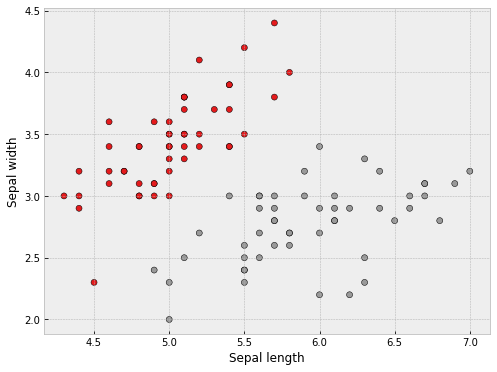

In [85]:
# Plot first two features
X = data.T # size dxN, d=2, N=100
y = target

plt.figure(figsize = (8,6))
plt.scatter(X[0,:], X[1,:], c=y, cmap = plt.cm.Set1, edgecolor='k')

plt.xlabel('Sepal length'); plt.ylabel('Sepal width');


If we choose one of these features as a variable to distinguish between the two classes, it will not be enough:

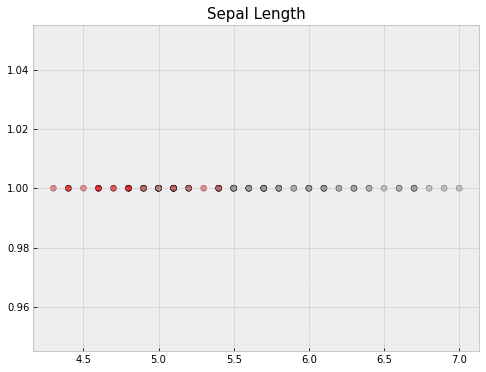

In [87]:
plt.figure(figsize=(8, 6))

plt.scatter(X[0,:], np.ones(len(X[0,:])), cmap = plt.cm.Set1, edgecolor='k', c=y, alpha=0.5)

plt.title('Sepal Length', size=15);

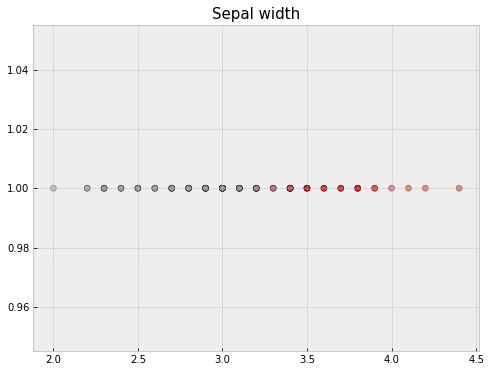

In [88]:
plt.figure(figsize=(8, 6))

plt.scatter(X[1,:], np.ones(len(X[1,:])), cmap = plt.cm.Set1, edgecolor='k', c=y, alpha=0.5)


plt.title('Sepal width',size=15);

However, we can see from the figure that these classes can be separated by a line. Just not a line that is parallel to the coordinate axes.

* If we represent these classes using a **rotated set of axes**, then we can perform data reduction to one-dimension.

___

# Rotation Matrices

From previous video, we saw that the vectors for axes rotated **counterclockwise** by $\theta$ degrees are:

$$\mathbf{x}'=[\cos \theta, \sin\theta]^T$$

and

$$\mathbf{y}'=[\cos (\theta + 90^\circ), \sin(\theta+90^\circ)]^T$$

Applying standard trignometry identities, we have:

$$\mathbf{y}'=[-\sin (\theta ), \cos(\theta)]^T$$

Thus, the vertically stacked vectors form the following rotation array:

$$R = \left[\mathbf{x} | \mathbf{y}\right] = \left[\begin{array}{cc} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right]$$

In [89]:
def makerot(theta):
    '''This function creates a 2x2 rotation 
    matrix for a given angle (theta) in degrees'''
    
    theta = np.radians(theta)
    
    R = np.array([[np.cos(theta), -np.sin(theta)],
                 [np.sin(theta), np.cos(theta)]])   
    
    return R

In [90]:
R = makerot(60)

R

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

We know how to perform the dot product of these axes vectors with a single vector:

In [91]:
X[:,0]

array([5.1, 3.5])

In [103]:
r1 = R.T@X[:,0]

r1

array([ 5.58108891, -2.66672956])

Rotating by $\theta$ and then rotating by $-\theta$ should return the original value:

In [105]:
R2 = makerot(-60)
R2

array([[ 0.5      ,  0.8660254],
       [-0.8660254,  0.5      ]])

In [96]:
R2@R

array([[1., 0.],
       [0., 1.]])

Note that the combined operation is:

In [97]:
R2.T@(R.T@X[:,0])

array([5.1, 3.5])

Since dot product is associative, we could instead do:

In [98]:
R.T@(R2.T@X[:,0])

array([5.1, 3.5])

And we can find the combined matrix operation for rotating and derotating:

In [99]:
R2@R

array([[1., 0.],
       [0., 1.]])

This is our first encounter with an **identity matrix**. 

<div class="alert alert-info">
    <b>Identity matrix</b>

An identity matrix $\mathbf{I}_k$ is a $k \times k$ matrix that has ones on the diagonal and zeros everywhere else.
</div>

In [101]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

We are not quite ready to fully explore identity matrices yet.

Let's look at the original vector and its representation on the rotated axes:

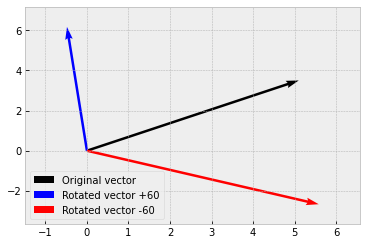

In [107]:
plotvec(X[:,0], R@X[:,0], R2@X[:,0])

plt.legend(['Original vector','Rotated vector +60','Rotated vector -60'],loc='lower left');

What happens if we hstack vectors on the right-hand side, too?

In [108]:
X[:, :2]

array([[5.1, 4.9],
       [3.5, 3. ]])

In [109]:
A = X[:,:2]

B = R@A # R is a rotation matrix with 60 degrees angle
A, B

(array([[5.1, 4.9],
        [3.5, 3. ]]),
 array([[-0.48108891, -0.14807621],
        [ 6.16672956,  5.74352448]]))

The output is horizontally stacked vectors, too!

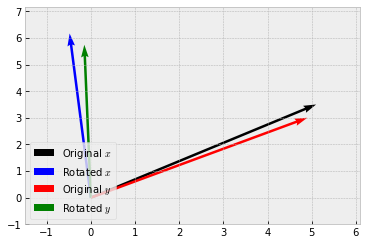

In [110]:
plotvec(A[:,0], B[:,0], A[:,1], B[:,1])
plt.legend(['Original $x$','Rotated $x$','Original $y$','Rotated $y$'],
          loc='lower left');

We can rotate all the vectors in the iris data set by taking the inner product of the basis vectors (in columns of an array) with data in columns of an array:

In [111]:
rotated = R@X

X.shape, rotated.shape

((2, 100), (2, 100))

Using this, plot the rotated data, and find a rotation that makes the two clusters separable using only the x-axis value:

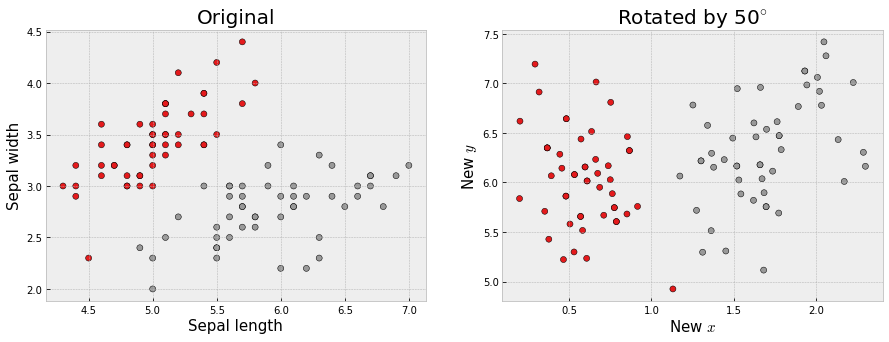

In [118]:
angle = 50
axes = makerot(angle)

# Find a good value that allows data to be 
# separated using only x-axis info

rotated=axes@X

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length',size=15); plt.ylabel('Sepal width', size=15)
plt.title('Original',size=20)

plt.subplot(122)
plt.scatter(rotated[0, :], rotated[1,:], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('New $x$',size=15); plt.ylabel('New $y$', size=15);
plt.title('Rotated by '+str(angle)+'$^{\circ}$',size=20);

Now we want to do data reduction to only one feature (corresponding to the y-axis). To do that, we just conduct the inner product with only the first basis vector from the rotation matrix:

In [119]:
R = makerot(50)
R

array([[ 0.64278761, -0.76604444],
       [ 0.76604444,  0.64278761]])

In [122]:
rotated_data = R@X

rotated_data.shape, X.shape

((2, 100), (2, 100))

In [124]:
new_best_feature = rotated_data[0,:]
new_best_feature.shape

(100,)

Now the output is a vector of one feature per input vector

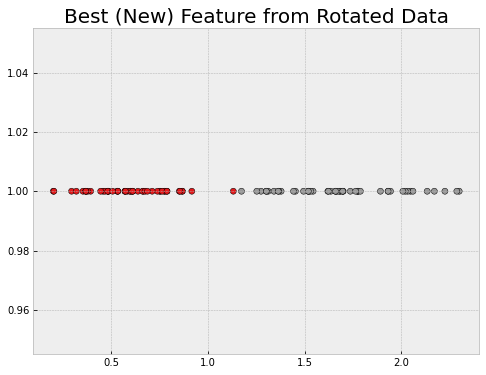

In [125]:
plt.figure(figsize=(8, 6))

plt.scatter(new_best_feature, np.ones(len(new_best_feature)), 
            cmap = plt.cm.Set1, edgecolor = 'k', c=y)

plt.title('Best (New) Feature from Rotated Data', size=20);

In [126]:
new_worst_feature = rotated_data[1,:]
new_worst_feature.shape

(100,)

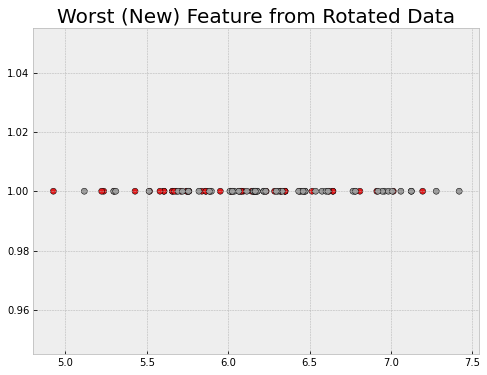

In [127]:
plt.figure(figsize=(8, 6))

plt.scatter(new_worst_feature, np.ones(len(new_worst_feature)), 
            cmap = plt.cm.Set1, edgecolor = 'k', c=y)

plt.title('Worst (New) Feature from Rotated Data', size=20);

With our perspective of arrays as horizontally stacked vectors, we can do inner products with any numbers of vectors and get out the corresponding inner products.

For example:

In [128]:
G = np.array([[3,7], # two 3-vectors
            [1,1],
            [0,-2]])

G

array([[ 3,  7],
       [ 1,  1],
       [ 0, -2]])

In [129]:
G.shape

(3, 2)

In [130]:
H = np.array([[2,2,2,2], # four 3-vectors
            [-1,2,-1,2],
            [5,3,2,4]])
H

array([[ 2,  2,  2,  2],
       [-1,  2, -1,  2],
       [ 5,  3,  2,  4]])

In [131]:
H.shape

(3, 4)

In [132]:
G.T@H

array([[ 5,  8,  5,  8],
       [ 3, 10,  9,  8]])

In [133]:
(G.T@H).shape

(2, 4)

The $i$th row represents all the inner product associated with the $i$th vector in G:

In [134]:
G[:,0]@H

array([5, 8, 5, 8])

The $j$th column represents all the inner products associated with the $j$th vector in H:

In [135]:
G.T@H[:,0]

array([5, 3])

Thus the $(i,j)$-th entry in the output matrix is the dot product from the $i$th left vector and the $j$th right vector.